## Set up environment
The file `environment.yml` specifies the dependencies required to run the TRangle package. You can create a conda environment using this file:

```bash
conda env create -f environment.yml
```
In the main project directory run
```bash
pip install -e .
```


## Measure angles of existing TCR structures
To measure angles in existing TCR structures, you can use the `new_calc.py` script provided in the TRangle package. This script allows you to calculate angles and distances in a TCR structure file.


```bash
python trangle/new_calc.py --input_pdb path/to/your/input.pdb
```
This will output a CSV file with the measured angles and distances.
It will also output a PDB of the extracted variable domain, was well as a visualiseation of the measured angles and distance saved as an image and a .pse file which can be opened in PyMOL.


## Measure angles of existing TCR trajectories
To measure angles in existing TCR trajectories, you can use the `new_calc_MD.py` script provided in the TRangle package. This script allows you to calculate angles and distances in a TCR trajectory file.

```bash
python trangle/new_calc_MD.py --input_traj path/to/your/input.traj --input_pdb path/to/your/input.pdb
```

## Change geometry of a TCR structure

To change the geometry of a TCR structure, you can use the `change_geometry.py` script provided in the TRangle package. This script allows you to modify angles and distances in a TCR structure based on a configuration file.

```bash
python trangle/change_geometry.py --config config.ini --input_pdb path/to/your/input.pdb
```
This script will read the configuration file, apply the specified changes to the angles and distances, and output a new PDB file with the modified geometry. It will also generate a visualization of the modified structure for inspection.


## Extract loop anchor residue coordinates
To extract the coordinates of loop anchor residues from a TCR structure, you can use the `extract_loop_anchor.py` script provided in the TRangle package. This script allows you to specify the loop anchor residues and extract their coordinates from a TCR structure file.

```bash
python trangle/get_anchor_coords.py path/to/your/input.pdb 
```
This will output a dictionary containing the coordinates of the specified loop anchor residues, which can be used for input to the CDR loop diffusion model.

# Example Usage of TRangle



### Measure angles of existing TCR structures

In [5]:
%cd ../
!pip install -e .
%cd examples

/workspaces/Graphormer/TRangle
Obtaining file:///workspaces/Graphormer/TRangle
  Attempting uninstall: trangle
    Found existing installation: trangle 0.1.0
    Uninstalling trangle-0.1.0:
      Successfully uninstalled trangle-0.1.0
  Running setup.py develop for trangle
/workspaces/Graphormer/TRangle/examples


In [6]:
import sys
import os
from pathlib import Path
import trangle
from trangle.new_calc import run
input_pdb="2cdf.pdb"
result_angles=run(input_pdb, Path("./output"), vis=True)

✅ PyMOL script written: output/vis/vis.py
 Ray: render time: 0.62 sec. = 5822.7 frames/hour (0.62 sec. accum.).


  pdb_name          BA         BC1        AC1        BC2         AC2  \
0   2cdffv  125.667456  125.646685  76.255651  37.923329  162.082957   

          dc  
0  15.105783  


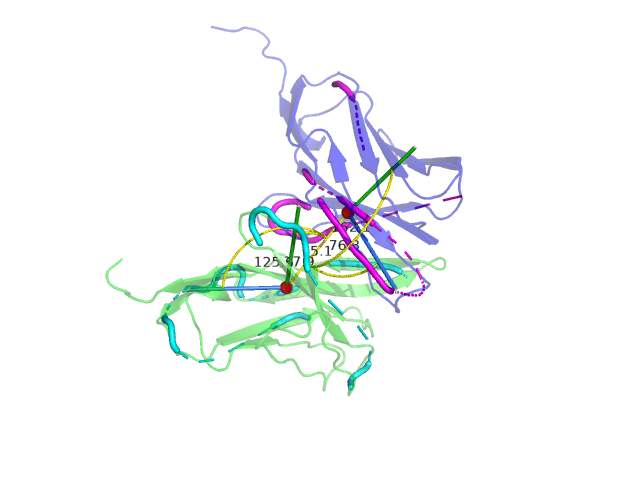

In [7]:
print(result_angles)
#display png
from IPython.display import Image
from IPython.display import display
image_path = Path("./output/vis/vis.png")
if image_path.exists():
    display(Image(filename=image_path))


### Measure angles and distance of TCR trajectories

In [ ]:
#Measure angles and distance of TCR trajectories
from trangle.new_calc_MD import run
pdb_file="A6prmtop_first_frame.pdb"
md_file="Prod_Concat_A6_CMD.xtc"
out_dir="output_MD"
run(pdb_file, md_file, out_dir)


### Generate TCRs with specified geometry

In [10]:
from trangle.change_geometry import run as change_geometry_run
input_pdb = "2cdf.pdb"
out_path = "output_new_geo"
BA = 122.9
BC1 = 109.2
BC2 = 64.5
AC1 = 68.39
AC2 = 154
dc = 15.2
change_geometry_run(input_pdb,out_path, BA, BC1, BC2, AC1, AC2, dc)

✅ PyMOL script saved as vis_geometry.py. Run with:
   pymol -cq vis_geometry.py
Consensus structure saved to: output_new_geo/2cdf/consensus_oriented.pdb
Chains moved to new geometry.
✅ PyMOL script saved as output_new_geo/2cdf/vis/2cdf_vis.py. Run with:
   pymol -cq output_new_geo/2cdf/vis/2cdf_vis.py
 Ray: render time: 0.68 sec. = 5305.9 frames/hour (0.68 sec. accum.).
Output files saved in: output_new_geo/2cdf
Angles saved to: output_new_geo/2cdf/angles.txt


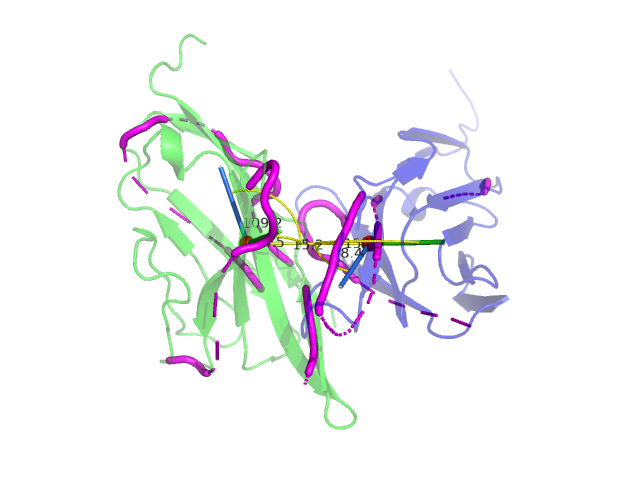

In [11]:

from IPython.display import Image
from IPython.display import display
image_path = Path("output_new_geo/2cdf/vis/2cdf_vis.png")
if image_path.exists():
    display(Image(filename=image_path))


In [12]:
### Extract anchor point coordinates from TCR structure
from trangle.get_anchor_coords import run as extract_anchor_points_run

anchor_coords=extract_anchor_points_run("2cdf.pdb")
print(anchor_coords)

{'B': {'CDR1': {'start': [103.9, -27.288, -81.137], 'end': [100.849, -12.745, -64.196]}, 'CDR2': {'start': [111.194, -33.704, -70.59], 'end': [104.831, -33.251, -72.44]}, 'CDR3': {'start': [111.674, -18.013, -80.758], 'end': [75.717, -22.968, -71.399]}}, 'A': {'CDR1': {'start': [113.424, -3.806, -65.436], 'end': [101.415, -13.119, -81.303]}, 'CDR2': {'start': [125.075, -0.308, -73.75], 'end': [123.161, -2.246, -64.928]}, 'CDR3': {'start': [108.707, -9.592, -65.94], 'end': [91.359, 18.285, -84.646]}}}
